# Binary Classification with SciKitLearn
--------------------------
### Contents:
- **Background**
- **Data importing/preprocessing **
- **Feature selection and dimensionality reduction **
- **SVM classifier - **
- **Logistic regression -**
- **Random forest - **

--------------------------

### Section 1: Background 
In this assignment, your task is to build a binary classifier that can distinguish between two brain disorders - Alzheimer's (AD) and Progressive Supranuclear Palsy (PSP). We will be using gene expression data sourced by RNA sequencing (RNA-seq) the brain tissue of  participants. The study can be found at [<sup>1</sup>](#fn1).

Using RNA sequencing we can quantitatively measure which genes are activated and their expression levels. By comparing the gene expression levels of normal and mutated cells, we can identify differences that might reveal which genes are causing these mutations. These gene expression patterns can also serve as indicators to detect and differentiate similar diseases such as AD and PSP.


<span id="fn1"> <sup>1</sup> https://www.nature.com/articles/sdata201689</span>

--------------------------




### Section 2: Data importing/preprocessing

- Load the gene expression dataset and the labels into pandas dataframe. 
- Retain only 'Diagnosis' and 'ID' columns in the labels dataframe.
- Combine gene_exp and labels dataframes based on 'ID'. 
- Remove samples containing labels other than Alzheimer's ('AD') or Progressive supranuclear palsy ('PSP').
- Encode textual labels to numbers. For example 'AD' to 0 and 'PSP' to 1.

--------------------------


In [5]:
import pandas as pd
import numpy as np

# do not modify this
np.random.seed(89802024)


In [6]:
# Read the gene expression dataset (normalized_gene_expression.txt) into a dataframe

gene_exp = pd.read_csv('normalized_gene_expression.txt',sep='\t')
gene_exp.head()

,ID,ENSG00000223972,ENSG00000227232,ENSG00000243485,ENSG00000268020,ENSG00000240361,ENSG00000186092,ENSG00000238009,ENSG00000239945,ENSG00000233750,...,ENSG00000198886,ENSG00000210176,ENSG00000210184,ENSG00000210191,ENSG00000198786,ENSG00000198695,ENSG00000210194,ENSG00000198727,ENSG00000210195,ENSG00000210196
0,11344_TCX,-2.168275,2.867350,-2.235659,-2.878004,-2.878004,-2.921482,0.972981,2.589508,2.049147,...,15.177233,8.620554,8.415900,9.195871,13.407342,13.089514,10.035159,14.350876,8.401389,9.124693
1,11316_TCX,-2.667791,2.919402,-3.118351,-2.963895,-2.963895,-2.963895,1.602722,3.196802,2.830484,...,15.177233,11.611706,11.478740,12.284014,13.527804,13.350245,12.613126,14.240878,10.760811,12.021301
2,11431_TCX,-3.391138,3.153625,-2.106056,-4.424961,-4.418319,-4.540941,1.453881,2.986039,2.836847,...,15.177233,10.502635,10.133659,11.504803,13.407342,13.138792,11.990068,14.472362,9.848741,10.852588
3,11341_TCX,-2.801722,3.269001,-1.133302,-3.118351,-3.118351,-3.175145,2.442415,3.961310,2.803290,...,14.764855,9.920577,10.133659,11.255892,13.466460,13.350245,12.182661,14.240878,9.637298,9.904126
4,11289_TCX,-0.162419,5.284041,0.250976,-2.218957,-2.218957,-2.328570,2.065006,3.218117,2.857921,...,14.764855,11.780232,11.209200,12.021301,13.350245,13.189390,12.353690,14.350876,11.722941,11.959163


In [7]:
print(gene_exp.columns)

Index(['ID', 'ENSG00000223972', 'ENSG00000227232', 'ENSG00000243485',
       'ENSG00000268020', 'ENSG00000240361', 'ENSG00000186092',
       'ENSG00000238009', 'ENSG00000239945', 'ENSG00000233750',
       ...
       'ENSG00000198886', 'ENSG00000210176', 'ENSG00000210184',
       'ENSG00000210191', 'ENSG00000198786', 'ENSG00000198695',
       'ENSG00000210194', 'ENSG00000198727', 'ENSG00000210195',
       'ENSG00000210196'],
      dtype='object', length=55757)


In [8]:
# Read the labels for the dataset from labels.csv file
diagnosis_map = {'AD': 0, 'PSP': 1}

labels = pd.read_csv('labels.csv')
print(labels.groupby('Diagnosis').size())
labels = labels[['ID', 'Diagnosis']]
labels = labels[labels['Diagnosis'].isin(['AD', 'PSP'])]
labels['Diagnosis'] = labels['Diagnosis'].map(diagnosis_map)
print(labels.groupby('Diagnosis').size())

Diagnosis
AD                  80
Control             76
PSP                 82
Pathologic Aging    30
dtype: int64
Diagnosis
0    80
1    82
dtype: int64


In [9]:
# Merge both dataframes based on column 'ID' 

df = pd.merge(gene_exp, labels, on='ID')
df.drop('ID', axis=1, inplace=True)
df['Diagnosis'].value_counts()


Diagnosis
1    82
0    80
Name: count, dtype: int64

In [10]:
# Separate the merged dataframe into features and labels. Remove 'ID' column

X = df.drop('Diagnosis', axis=1).values
y = df['Diagnosis'].values
print(y)

[1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0]


In [11]:
# Encode textual labels in 'y' to numbers
# took care of that already
# from sklearn.preprocessing import LabelEncoder

# y = 
assert(np.all((y == 0) | (y == 1)))

--------------------------
### Section 3 - Feature selection and dimensionality reduction 

On analyzing the shape of the gene expression dataframe we can see that the number of features (p) is much larger than the number of observations (N). This is known as the p >> N problem, and is commonly seen in genomics and healthcare datasets.
To mitigate this problem, we will employ feature selection and dimensionality reduction techniques so that we have a more compact feature space. 


- Randomly select 100 features.
- Select top 1%  most variant features.
- Perform PCA and select principal components that account for 95% of the total explained variance.
    - Plot the first two principal components of X_projected, coloring data points by their labels. Explain if the data is linearly separable in this plot.

  
--------------------------


In [13]:
# Randomly select 100 features

X_rand = X[:, :100]

assert X_rand.shape == (162, 100)

In [14]:
# Select top 1% the features with the most variance
from sklearn.feature_selection import VarianceThreshold
variances = np.var(X, axis=0)

num_features = len(variances)
k = int(num_features * 0.01)

variance_threshold = np.sort(variances)[-k]

selector = VarianceThreshold(threshold=variance_threshold)

X_var = selector.fit_transform(X)

X_var.shape


selected_indices = selector.get_support(indices=True)

print(f"Original features: {X.shape[1]}")
print(f"Selected features: {X_var.shape[1]}")
print(f"Selected indices: {selected_indices}")

Original features: 55756
Selected features: 556
Selected indices: [  544   546   560   599   603   636   690   757   791   827   925  1395
  1424  1447  1482  1578  1713  1844  1926  2135  2193  2360  2481  3129
  3130  3132  3143  3303  3352  3382  3402  3429  3513  3517  3521  3674
  3690  3836  4061  4062  4112  4134  4258  4342  4752  4931  4992  5136
  5159  5203  5244  5246  5261  5487  5496  5897  5902  5972  6373  6407
  6408  6424  6425  6426  6518  6618  6638  6639  6644  6662  6745  6920
  6925  6931  7017  7019  7024  7148  7149  7150  7213  7340  7365  7422
  7530  7824  8137  8605  8606  8784  8876  9517  9813 10082 10155 10438
 10526 10612 10733 10744 10745 10777 10778 10814 10985 11282 11291 11630
 11914 11953 11999 12107 12336 12459 12619 12625 13046 13082 13144 13145
 13187 13189 13190 13369 13383 13384 13406 14169 14170 14412 14906 14908
 14921 15050 15103 15127 15250 15252 15256 15257 15258 15494 15619 16292
 16305 16430 16461 17150 17341 17374 17435 17519 17617 176

In [15]:
# Use full PCA and select only components contributing to 95% total variance
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(X_var)

pca = PCA(n_components=0.95)
X_projected = pca.fit_transform(X_scaled)

# Check how many components were selected
print(f"Original dimensions: {X_var.shape[1]}")
print(f"Reduced dimensions: {X_projected.shape[1]}")
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Cumulative explained variance: {np.cumsum(pca.explained_variance_ratio_)}")
X_projected.shape

Original dimensions: 556
Reduced dimensions: 114
Explained variance ratio: [0.15773353 0.07662444 0.06127059 0.04941696 0.03280198 0.02832707
 0.02144712 0.01985306 0.01639035 0.01540489 0.014105   0.01201804
 0.01126516 0.01087117 0.01063115 0.00958752 0.00896924 0.00878719
 0.00869705 0.00807773 0.00801964 0.00793268 0.00765184 0.00758382
 0.00740722 0.00730089 0.00710727 0.00703093 0.00681347 0.00678898
 0.00647027 0.00630605 0.00614017 0.00606646 0.00596724 0.00594733
 0.00579418 0.0056684  0.00546887 0.00540585 0.00535652 0.0052418
 0.00515109 0.00507324 0.00495248 0.00490611 0.00483721 0.00471533
 0.0046814  0.00457745 0.004508   0.0044461  0.00440273 0.00430533
 0.00427277 0.00421011 0.00410448 0.00404563 0.00395769 0.00384067
 0.00382028 0.00378786 0.00375938 0.00370194 0.00360344 0.00355127
 0.00351742 0.00350204 0.00344762 0.00343009 0.00341596 0.00335155
 0.00326522 0.00322133 0.00319508 0.00315156 0.00311353 0.00303708
 0.00300093 0.00293388 0.00288956 0.00284676 0.00278426

(162, 114)

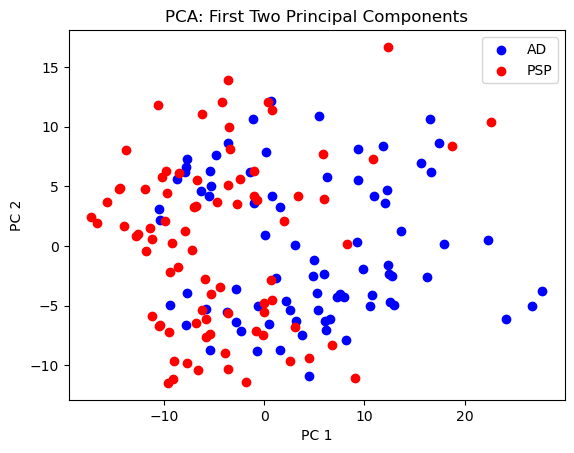

In [16]:
# Scatter plot of first two principal components 

import matplotlib.pyplot as plt 

plt.scatter(X_projected[y==0, 0], X_projected[y==0, 1], color='blue', label='AD') 
plt.scatter(X_projected[y==1, 0], X_projected[y==1, 1], color='red', label='PSP') 
plt.title('PCA: First Two Principal Components') 
plt.xlabel('PC 1') 
plt.ylabel('PC 2') 
plt.legend() 
plt.show()

### Section 4: SVM classifier 
 

- Complete the 'evaluate_classifier' function to implement a SVM classifier. Use GridSearchCV to search for the optimal kernel and parameter C (C determines the margin width).
- Use 10-fold StratifiedKFold for cross-validation (CV) when searching. Set scoring to 'accuracy'. StratifiedKFold will divide our dataset into 10 sets, model will be trained on 9 sets and tested on 1 set. This results in 10 models, each fitted on different combinations of sets. 
- Print the best parameters and score found for each of X_rand, X_var, and X_projected after cross validation.

NOTE: We will not be doing a train-val-test split of the dataset in this assignment because of the small sample size. We will do a cross-validated train-test split for evaluations.


--------------------------


In [18]:
# print(X_rand)
# print(X_var)
# print(X_projected)

In [19]:
from sklearn import svm
from sklearn.model_selection import StratifiedKFold, GridSearchCV

def evaluate_classifier(clf, X, y, scoring, parameters, n_splits=10):
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    grid_search = GridSearchCV(
        estimator=clf,
        param_grid=parameters,
        scoring=scoring,
        cv=cv
    )
    
    # Fit the model
    grid_search.fit(X, y)
    
    # Print the best parameters and score
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best {scoring}: {grid_search.best_score_:.4f}")
    
    return grid_search

parameters = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [0.01, 0.1, 1, 10]}
scoring = 'accuracy'

# Initiate a SVM classifier
clf = svm.SVC(random_state=42)

# Evaluate on different feature sets
print("Evaluating on random features (X_rand):")
grid_rand = evaluate_classifier(clf, X_rand, y, scoring, parameters)

print("\nEvaluating on variance-selected features (X_var):")
grid_var = evaluate_classifier(clf, X_var, y, scoring, parameters)

print("\nEvaluating on PCA-projected features (X_projected):")
grid_projected = evaluate_classifier(clf, X_projected, y, scoring, parameters)

# Is X_projected performing better than the other two? No

Evaluating on random features (X_rand):
Best parameters: {'C': 10, 'kernel': 'poly'}
Best accuracy: 0.7728

Evaluating on variance-selected features (X_var):
Best parameters: {'C': 10, 'kernel': 'poly'}
Best accuracy: 0.8165

Evaluating on PCA-projected features (X_projected):
Best parameters: {'C': 10, 'kernel': 'rbf'}
Best accuracy: 0.8040


### Section 5: Logistic regression

We explored three basic methods for feature selection. Another approach for having fewer features is regularization. In lasso regularization, as we increase the parameter (it is called 'alpha' in sklearn), more and more coefficients of our features are shrinked to zero.

- Build logistic regression models using lasso regularization (L1 penalty) with varying alpha values.  
- We'll perform cross-validation using 'cross_validate' function to measure the performance of models. We will again use StratifiedKFold with 10 splits, but remember to get the splits on the original dataframe 'X'. 
    - Set scoring to 'accuracy'.
    - Record the mean test accuracy across CV splits for each alpha.
    - Record the mean number of non-zero coefficients across CV splits for each alpha.
- Repeat the above process but use ridge regression (l2 penalty) in logistic regression.
- Plot the number of non-zero feature coefficients recorded in both lasso and ridge regression versus alpha.  
- Plot cv accuracy recorded for both penalties versus alpha. Write two lines explaining why accuracy decreases as we increase alpha in lasso regression?

--------------------------


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.linear_model import LogisticRegression

# Assuming X and y are already defined in your environment
# X should be your feature matrix
# y should be your target variable

X = X_var


alphas = np.array([0.1, 1, 10, 100, 1000])
lasso_cv_acc = []
lasso_non_zero_coeff = []
ridge_non_zero_coeff = []
ridge_cv_acc = []

# Create StratifiedKFold validation of 10 splits on 'X'
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

for a in alphas:
    # Instantiate a logistic regression object. Use 'saga' solver and 'l1' penalty.
    # In LogisticRegression, C is the inverse of regularization strength (alpha)
    # So C = 1/alpha
    C = 1/a
    model = LogisticRegression(penalty='l1', C=C, solver='saga', random_state=42, max_iter=10000)
    
    # Perform cross validation as described above
    cv_results = cross_validate(
        model, 
        X, 
        y, 
        cv=skf, 
        scoring='accuracy',
        return_estimator=True  # This returns the fitted models for coefficient analysis
    )
    
    # Record mean of test_score of all 10 models
    mean_accuracy = np.mean(cv_results['test_score'])
    lasso_cv_acc.append(mean_accuracy)
    
    # Calculate and record mean of number of non-zero coefficients of all 10 models
    non_zero_counts = []
    for estimator in cv_results['estimator']:
        # Count non-zero coefficients (excluding intercept)
        non_zero_count = np.sum(estimator.coef_[0] != 0)
        non_zero_counts.append(non_zero_count)
    
    lasso_non_zero_coeff.append(np.mean(non_zero_counts))

for a in alphas:
    # Repeat the above but with 'l2' penalty
    C = 1/a
    model = LogisticRegression(penalty='l2', C=C, solver='lbfgs', random_state=42, max_iter=10000)
    
    cv_results = cross_validate(
        model, 
        X, 
        y, 
        cv=skf, 
        scoring='accuracy',
        return_estimator=True
    )
    
    mean_accuracy = np.mean(cv_results['test_score'])
    ridge_cv_acc.append(mean_accuracy)
    
    # For ridge regression, coefficients are rarely exactly zero, but can be very small
    # We'll count coefficients that are not "practically" zero (threshold of 1e-6)
    non_zero_counts = []
    for estimator in cv_results['estimator']:
        non_zero_count = np.sum(np.abs(estimator.coef_[0]) > 1e-6)
        non_zero_counts.append(non_zero_count)
    
    ridge_non_zero_coeff.append(np.mean(non_zero_counts))

print("Lasso Regularization (L1):")
for i, a in enumerate(alphas):
    print(f"Alpha = {a}: Accuracy = {lasso_cv_acc[i]:.4f}, Non-zero coefficients = {lasso_non_zero_coeff[i]:.1f}")

print("\nRidge Regularization (L2):")
for i, a in enumerate(alphas):
    print(f"Alpha = {a}: Accuracy = {ridge_cv_acc[i]:.4f}, Non-zero coefficients = {ridge_non_zero_coeff[i]:.1f}")


Lasso Regularization (L1):
Alpha = 0.1: Accuracy = 0.7596, Non-zero coefficients = 309.6
Alpha = 1.0: Accuracy = 0.7904, Non-zero coefficients = 87.5
Alpha = 10.0: Accuracy = 0.7908, Non-zero coefficients = 34.3
Alpha = 100.0: Accuracy = 0.4809, Non-zero coefficients = 0.2
Alpha = 1000.0: Accuracy = 0.5000, Non-zero coefficients = 0.0

Ridge Regularization (L2):
Alpha = 0.1: Accuracy = 0.7971, Non-zero coefficients = 556.0
Alpha = 1.0: Accuracy = 0.8033, Non-zero coefficients = 555.9
Alpha = 10.0: Accuracy = 0.7849, Non-zero coefficients = 556.0
Alpha = 100.0: Accuracy = 0.7790, Non-zero coefficients = 556.0
Alpha = 1000.0: Accuracy = 0.7482, Non-zero coefficients = 556.0


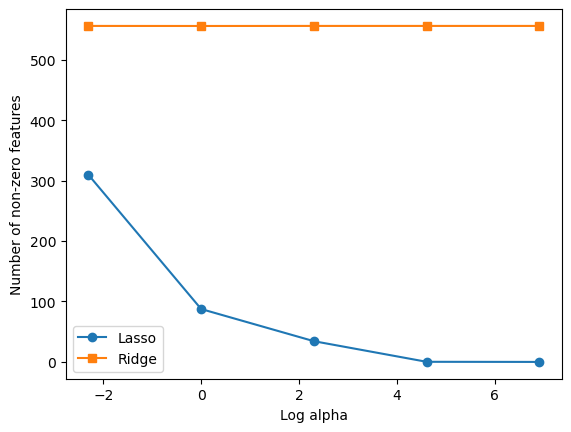

In [22]:
# Plot log of alpha vs number of non zero features. 

import matplotlib.pyplot as plt


plt.xlabel('Log alpha')
plt.ylabel('Number of non-zero features')
plt.plot(np.log(alphas), lasso_non_zero_coeff, 'o-', label='Lasso')
plt.plot(np.log(alphas), ridge_non_zero_coeff, 's-', label='Ridge')
plt.legend(loc="lower left")
plt.show()


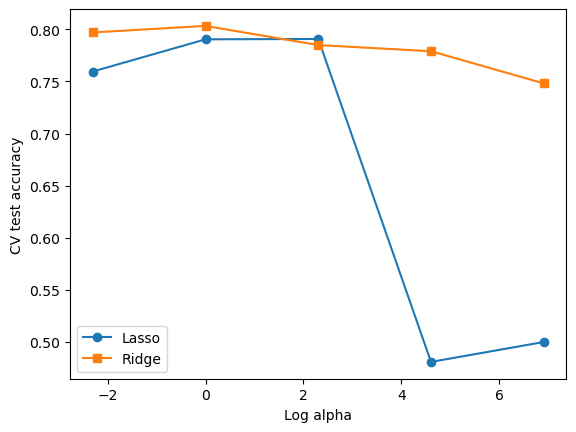

Lasso forces feature coefficients to zero as the alpha increases which tends to eliminate informative features
The sparsity created by high alpha values leads to underfitting in the model which results in decreased performance


In [23]:
# Plot log of alpha vs mean CV test accuracy. 

plt.xlabel('Log alpha')
plt.ylabel('CV test accuracy')
plt.plot(np.log(alphas), lasso_cv_acc, 'o-', label='Lasso')
plt.plot(np.log(alphas), ridge_cv_acc, 's-', label='Ridge')
plt.legend(loc="lower left")
plt.show()

# Write two lines below on why accuracy is decreasing in lasso?
print("Lasso forces feature coefficients to zero as the alpha increases which tends to eliminate informative features")
print("The sparsity created by high alpha values leads to underfitting in the model which results in decreased performance")

### Section 6: Random forest  
 
In this section, we will implement a random forest algorithm on X_projected (i.e., the data reduced using PCA). We will vary the number of trees and features considered when splitting nodes. 

-  Build random forest models with varying tree counts and features to consider when looking for the split.
-  Perform similar cross-validate with stratified folds, as in Section 5..
-  Record accuracies obtained for the test set for each hyperparameter combination.
-  Plot test accuracy vs tree count for each #features (m, m//2, sqrt(m)) we are using.
-  Repeat the above using just the first 25 components of X_projected.
--------------------------


In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Assuming X_projected and y are already defined
X_rf = X_projected

# Define parameters
num_trees = [1, 50, 100, 200, 300, 500, 1000]
m = X_rf.shape[1]
max_features = [m, m//2, 'sqrt']
test_accs = {}

# Create StratifiedKFold validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Dictionary to store results for each max_features setting
for features in max_features:
    test_accs[str(features)] = []
    
    for tree in num_trees:
        # Instantiate a random forest object. Set max_depth=5.
        rf = RandomForestClassifier(
            n_estimators=tree,
            max_features=features,
            max_depth=5,
            random_state=42
        )
        
        # Perform cross validation
        cv_scores = cross_val_score(
            rf, 
            X_rf, 
            y, 
            cv=skf, 
            scoring='accuracy'
        )
        
        # Record the mean of CV test scores
        test_accs[str(features)].append(np.mean(cv_scores))
        print(f"Max features: {features}, Trees: {tree}, Accuracy: {np.mean(cv_scores):.4f}")



Max features: 114, Trees: 1, Accuracy: 0.5547
Max features: 114, Trees: 50, Accuracy: 0.7282
Max features: 114, Trees: 100, Accuracy: 0.7222
Max features: 114, Trees: 200, Accuracy: 0.7223
Max features: 114, Trees: 300, Accuracy: 0.7225
Max features: 114, Trees: 500, Accuracy: 0.7286
Max features: 114, Trees: 1000, Accuracy: 0.7222
Max features: 57, Trees: 1, Accuracy: 0.5862
Max features: 57, Trees: 50, Accuracy: 0.7284
Max features: 57, Trees: 100, Accuracy: 0.7163
Max features: 57, Trees: 200, Accuracy: 0.7348
Max features: 57, Trees: 300, Accuracy: 0.7286
Max features: 57, Trees: 500, Accuracy: 0.7286
Max features: 57, Trees: 1000, Accuracy: 0.7286
Max features: sqrt, Trees: 1, Accuracy: 0.5496
Max features: sqrt, Trees: 50, Accuracy: 0.6411
Max features: sqrt, Trees: 100, Accuracy: 0.7091
Max features: sqrt, Trees: 200, Accuracy: 0.6847
Max features: sqrt, Trees: 300, Accuracy: 0.7034
Max features: sqrt, Trees: 500, Accuracy: 0.6975
Max features: sqrt, Trees: 1000, Accuracy: 0.709

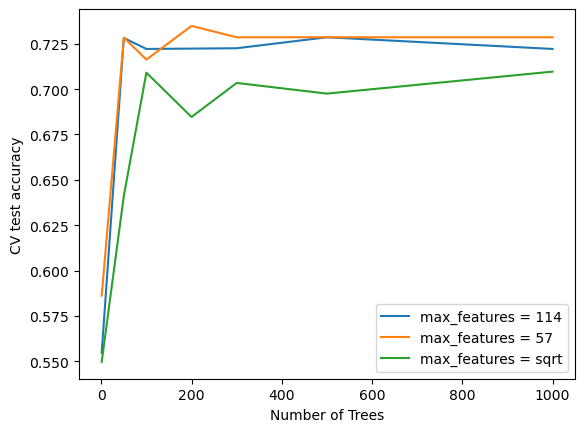

In [42]:
# Plot CV test accuracy vs number of trees 

plt.xlabel('Number of Trees')
plt.ylabel('CV test accuracy')
for i, max_feat in enumerate(max_features):
    plt.plot(num_trees, test_accs[str(max_feat)], label="max_features = "+str(max_feat))
plt.legend(loc="lower right")
plt.show()


#### Section 6.1: What are your observations in the plot above?


Repeating with first 25 components of X_projected:
Max features: 25, Trees: 1, Accuracy: 0.6227
Max features: 25, Trees: 50, Accuracy: 0.7657
Max features: 25, Trees: 100, Accuracy: 0.7718
Max features: 25, Trees: 200, Accuracy: 0.7657
Max features: 25, Trees: 300, Accuracy: 0.7595
Max features: 25, Trees: 500, Accuracy: 0.7593
Max features: 25, Trees: 1000, Accuracy: 0.7532
Max features: 12, Trees: 1, Accuracy: 0.6485
Max features: 12, Trees: 50, Accuracy: 0.7348
Max features: 12, Trees: 100, Accuracy: 0.7902
Max features: 12, Trees: 200, Accuracy: 0.7718
Max features: 12, Trees: 300, Accuracy: 0.7472
Max features: 12, Trees: 500, Accuracy: 0.7534
Max features: 12, Trees: 1000, Accuracy: 0.7655
Max features: sqrt, Trees: 1, Accuracy: 0.4756
Max features: sqrt, Trees: 50, Accuracy: 0.7466
Max features: sqrt, Trees: 100, Accuracy: 0.7468
Max features: sqrt, Trees: 200, Accuracy: 0.7470
Max features: sqrt, Trees: 300, Accuracy: 0.7778
Max features: sqrt, Trees: 500, Accuracy: 0.7903
Max

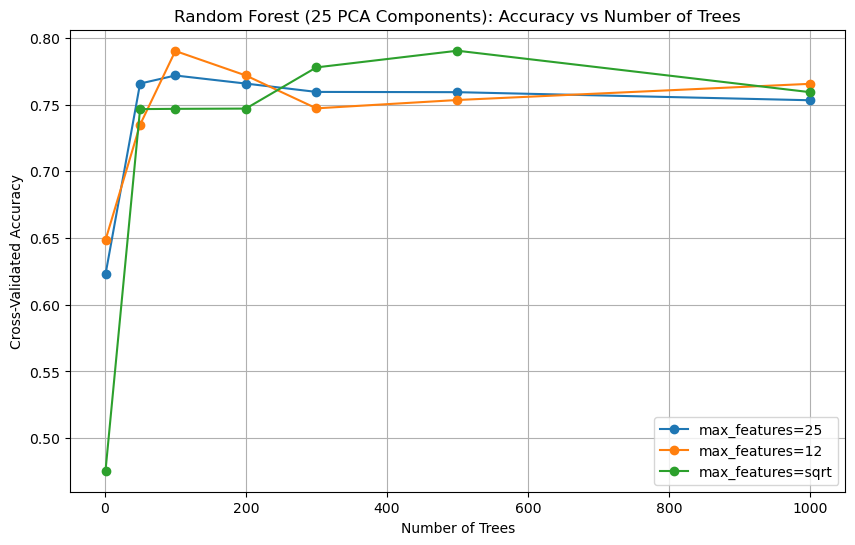

In [45]:
print("\nRepeating with first 25 components of X_projected:")
X_rf_25 = X_projected[:, :25]

test_accs_25 = {}
m_25 = X_rf_25.shape[1]
max_features_25 = [m_25, m_25//2, 'sqrt']

for features in max_features_25:
    test_accs_25[str(features)] = []
    
    for tree in num_trees:

        rf = RandomForestClassifier(
            n_estimators=tree,
            max_features=features,
            max_depth=5,
            random_state=42
        )
        
        cv_scores = cross_val_score(
            rf, 
            X_rf_25, 
            y, 
            cv=skf, 
            scoring='accuracy'
        )
        
        test_accs_25[str(features)].append(np.mean(cv_scores))
        print(f"Max features: {features}, Trees: {tree}, Accuracy: {np.mean(cv_scores):.4f}")

plt.figure(figsize=(10, 6))
for features, accuracies in test_accs_25.items():
    plt.plot(num_trees, accuracies, marker='o', label=f'max_features={features}')

plt.xlabel('Number of Trees')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Random Forest (25 PCA Components): Accuracy vs Number of Trees')
plt.legend()
plt.grid(True)
plt.show()

Use 100 to 300 trees for an trade-off between accuracy and performance, but once you hit 100 not a lot is gained.

Max features 12 is the best at around 100 and sqrt is the best around 300